In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [2]:
# Load the dataset
airlines_data = pd.read_csv('/Users/yeshwanthsatyadev/Desktop/EastWestAirlines.csv')

In [4]:
# Display the first few rows of the dataset
print(airlines_data.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [6]:
# Select relevant features for clustering
X = airlines_data.drop(['ID#', 'Award?'], axis=1) 

In [7]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Determine the optimum number of clusters for KMeans using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

/Users/yeshwanthsatyadev/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeshwanthsatyadev/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeshwanthsatyadev/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeshwanthsatyadev/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

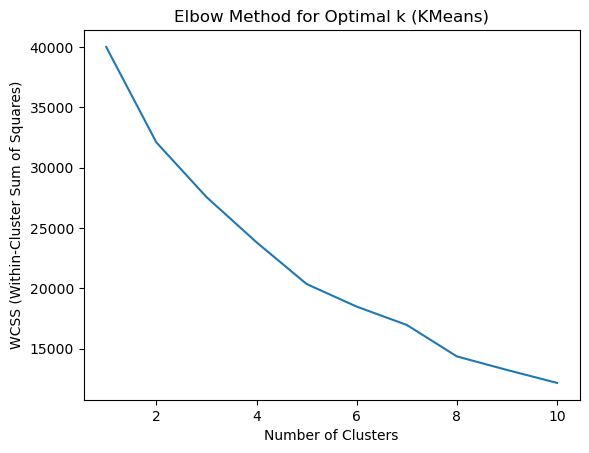

In [9]:
# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k (KMeans)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [10]:
# Based on the Elbow Method, choose the optimal number of clusters for KMeans
optimal_kmeans_clusters = 3 

In [11]:
# Hierarchical Clustering
# Using AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=optimal_kmeans_clusters, affinity='euclidean', linkage='ward')
agg_labels = agg_cluster.fit_predict(X_scaled)

/Users/yeshwanthsatyadev/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [20]:
# KMeans Clustering
kmeans = KMeans(n_clusters=optimal_kmeans_clusters, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add KMeans cluster labels to the DataFrame
airlines_data['KMeans_Cluster'] = kmeans_labels


/Users/yeshwanthsatyadev/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add DBSCAN cluster labels to the DataFrame
airlines_data['DBSCAN_Cluster'] = dbscan_labels


In [14]:

# Print cluster counts for each method
print(f'Hierarchical Clusters: {np.unique(agg_labels)}')
print(f'KMeans Clusters: {np.unique(kmeans_labels)}')
print(f'DBSCAN Clusters: {np.unique(dbscan_labels)}')

Hierarchical Clusters: [0 1 2]
KMeans Clusters: [0 1 2]
DBSCAN Clusters: [-1  0  1  2]


In [15]:

# Evaluate clustering using silhouette score
silhouette_agg = silhouette_score(X_scaled, agg_labels)
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels)

In [16]:
print(f'Silhouette Score (Hierarchical): {silhouette_agg}')
print(f'Silhouette Score (KMeans): {silhouette_kmeans}')
print(f'Silhouette Score (DBSCAN): {silhouette_dbscan}')

Silhouette Score (Hierarchical): 0.31619409882758315
Silhouette Score (KMeans): 0.3303711060539158
Silhouette Score (DBSCAN): 0.5767147191313959


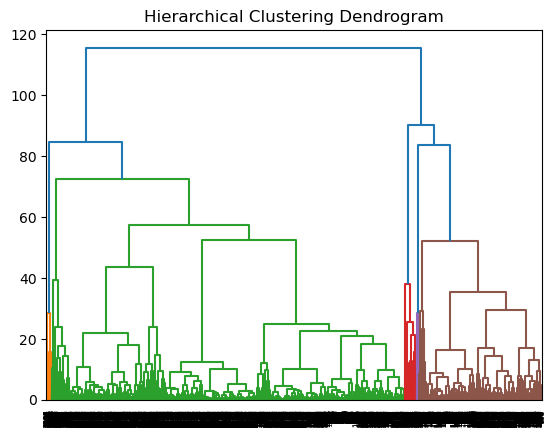

In [17]:
# Visualize Hierarchical Clustering Dendrogram
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

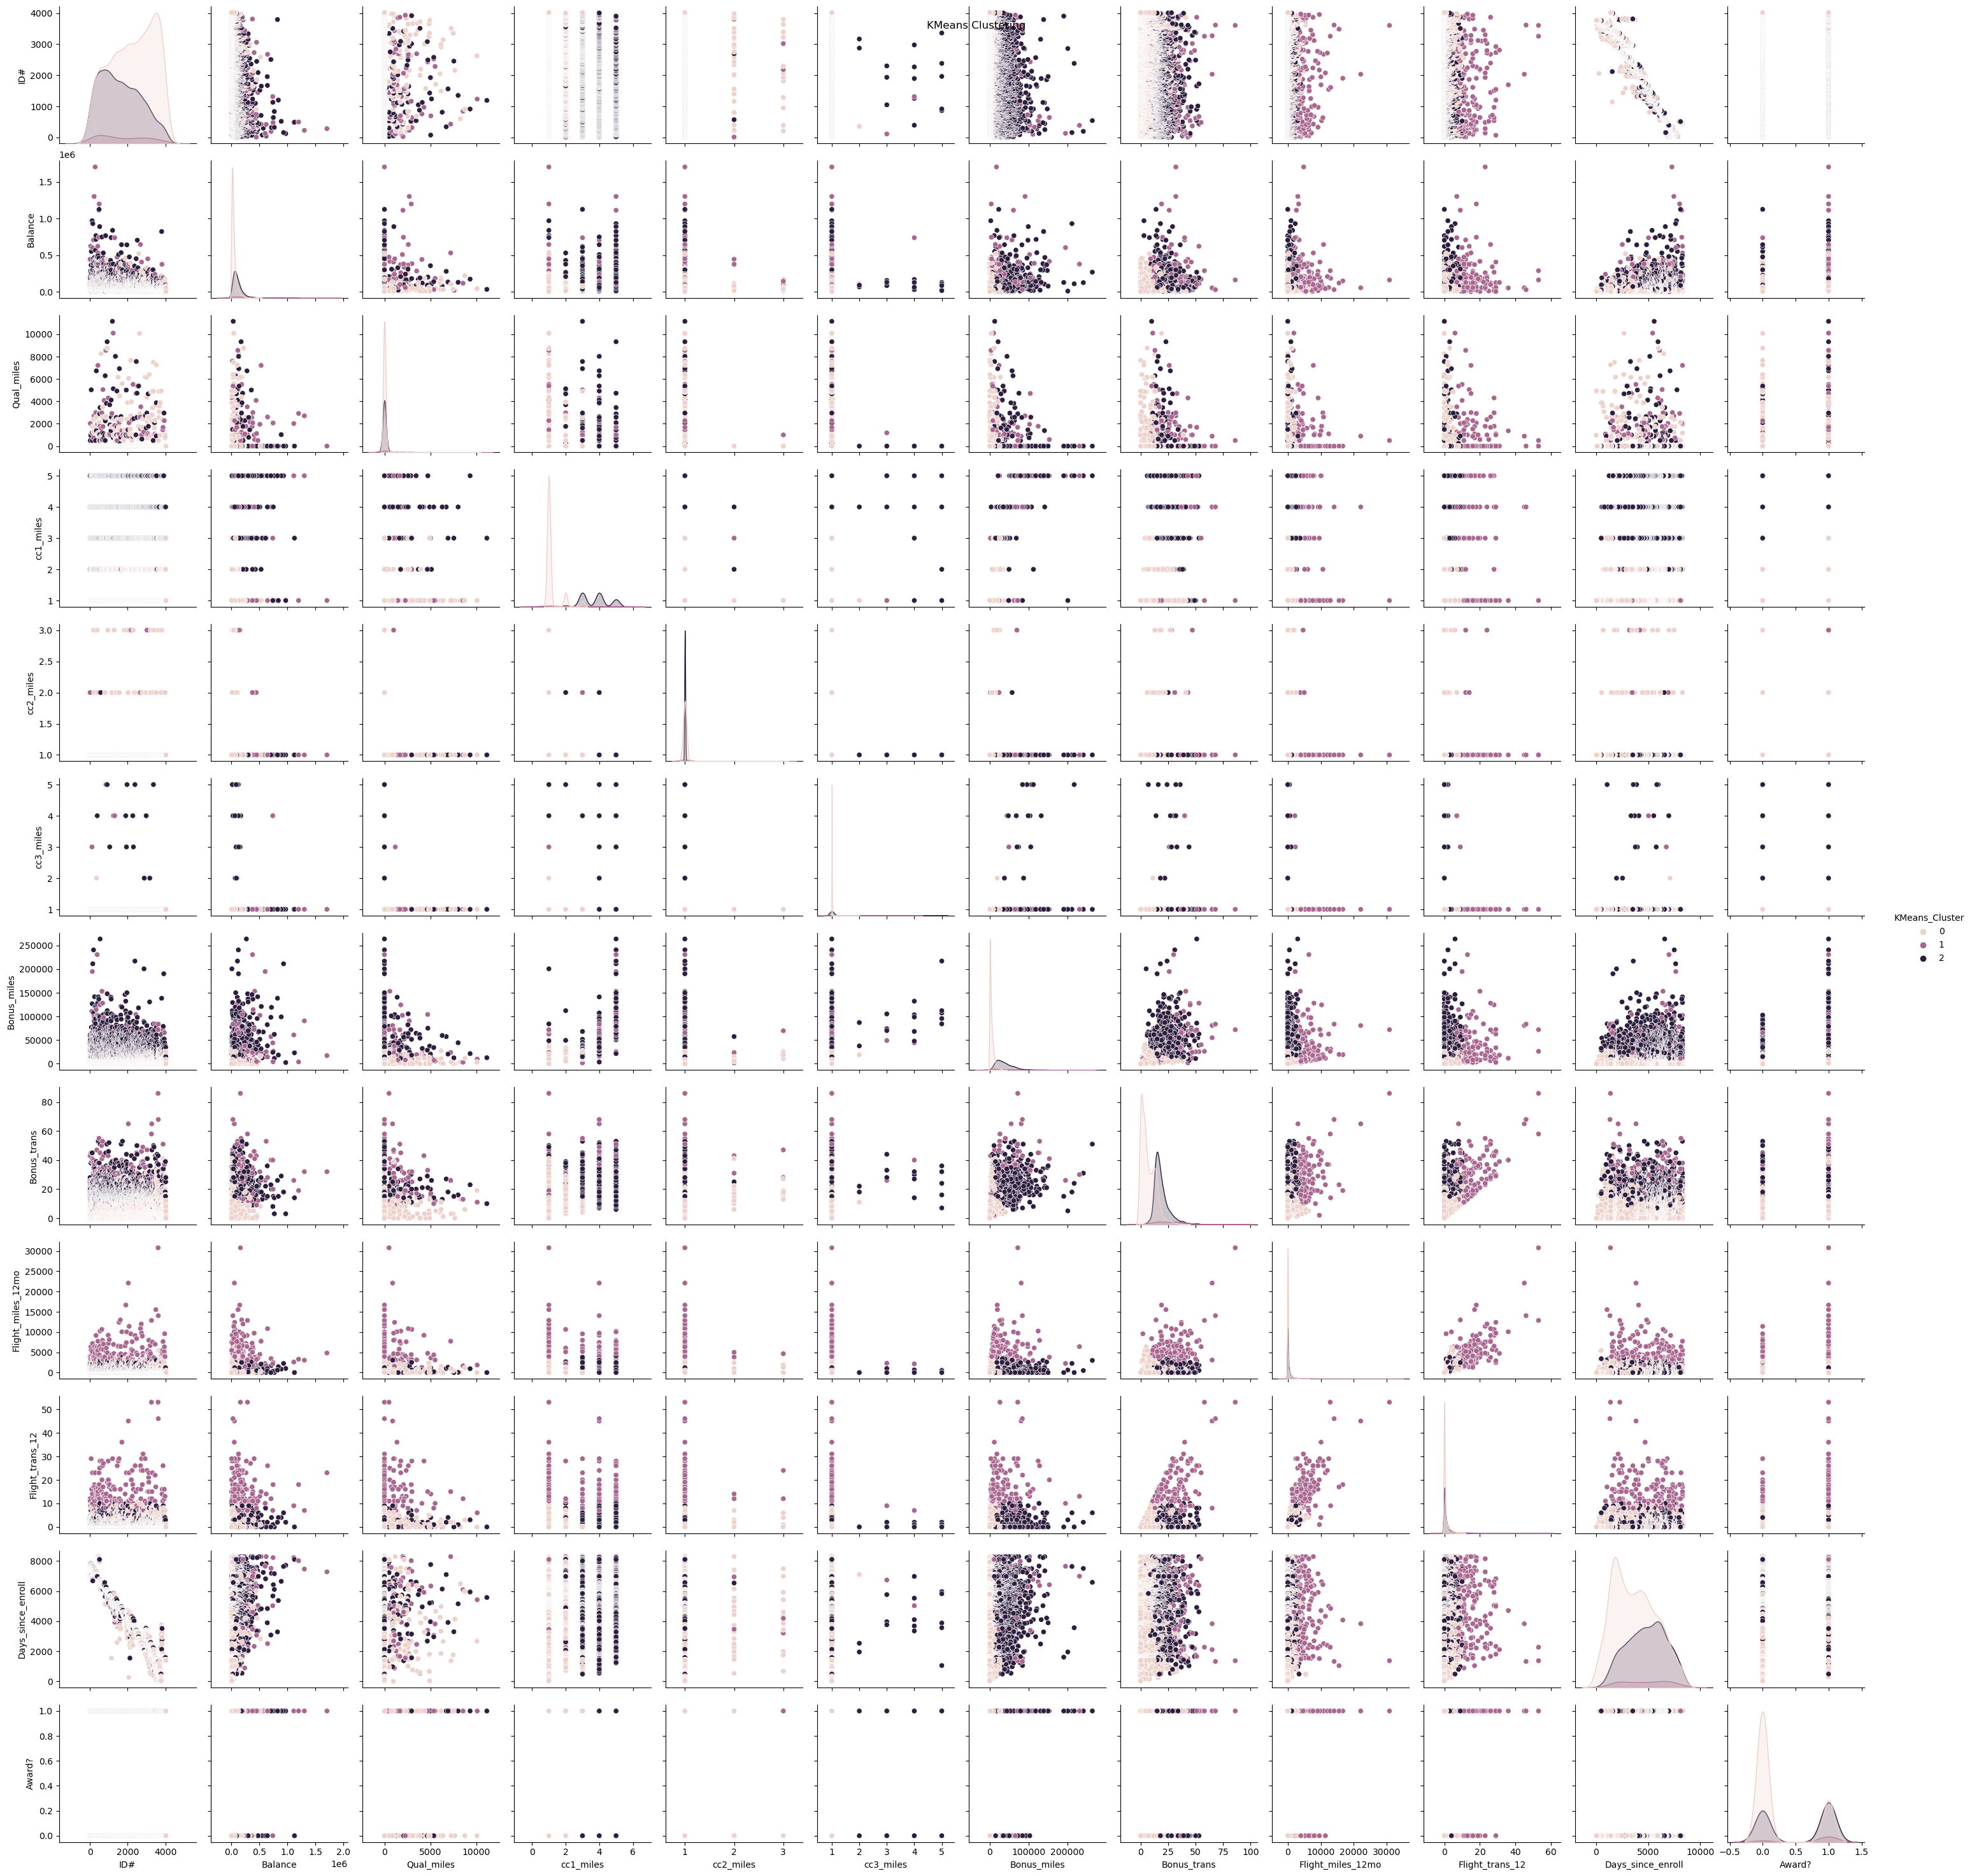

In [21]:
# Visualize KMeans Clustering
sns.pairplot(airlines_data, hue='KMeans_Cluster', diag_kind='kde')
plt.suptitle('KMeans Clustering')
plt.show()

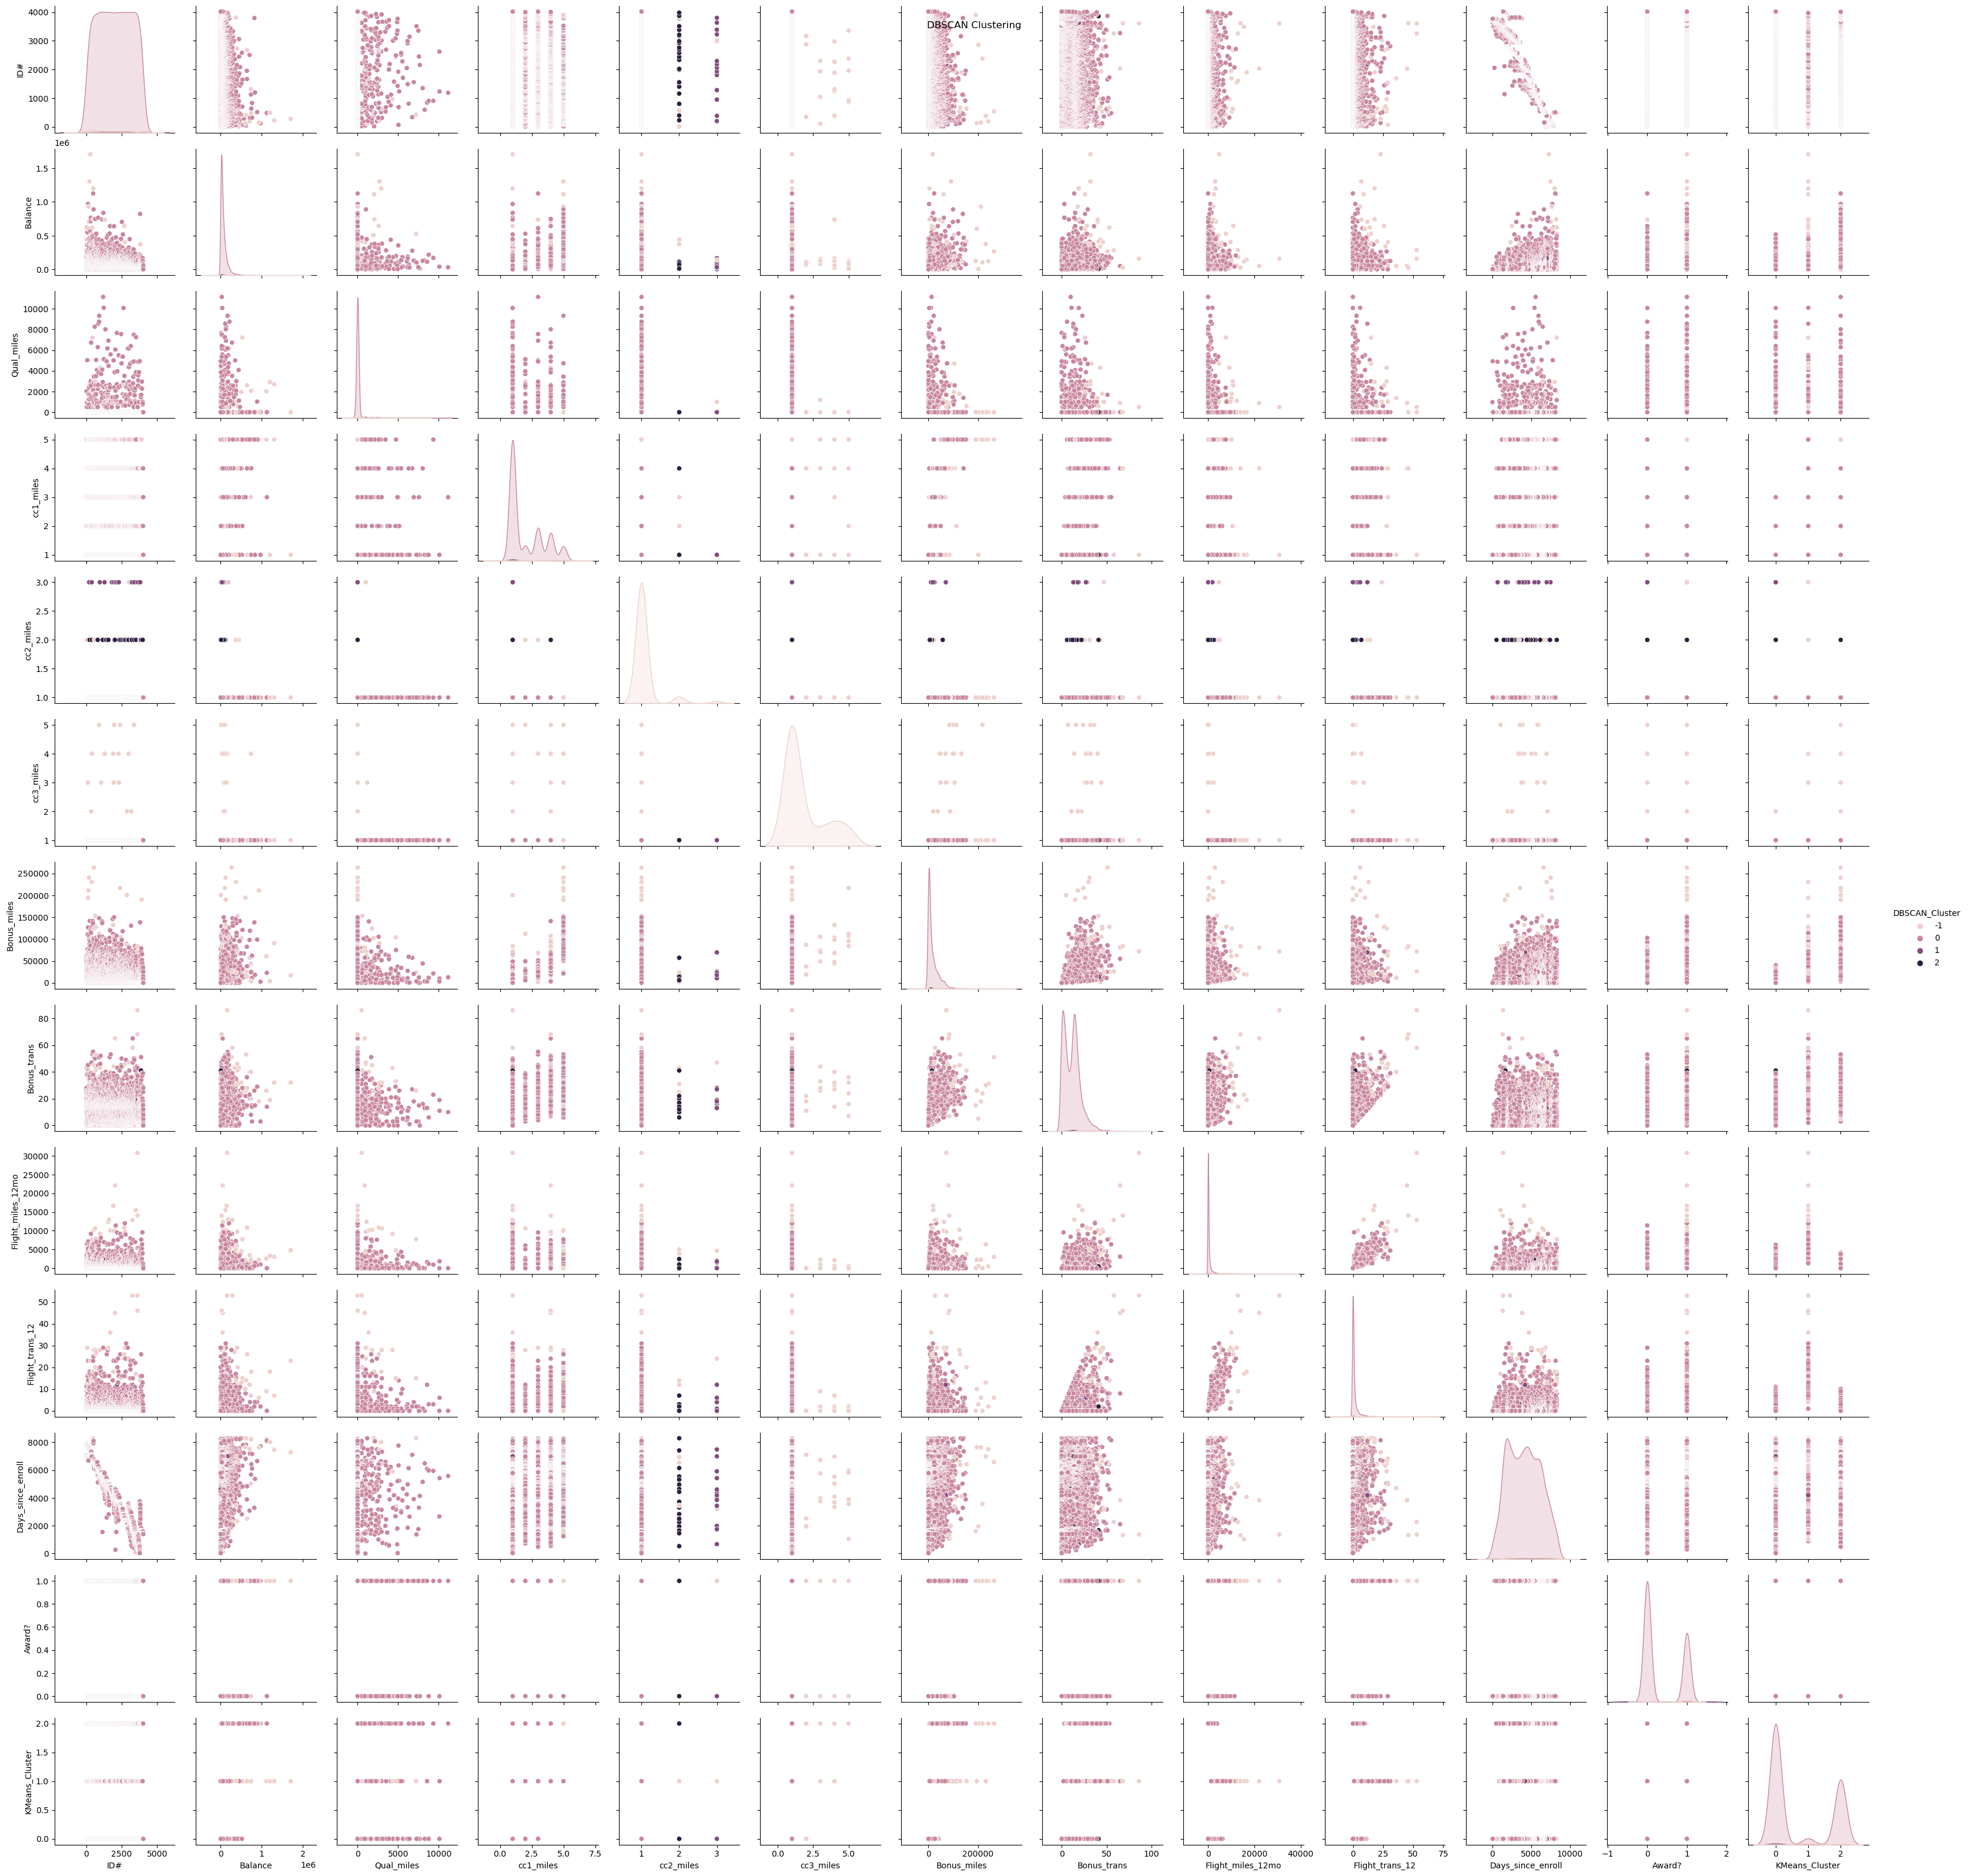

In [23]:
# Visualize DBSCAN Clustering
sns.pairplot(airlines_data, hue='DBSCAN_Cluster', diag_kind='kde')
plt.suptitle('DBSCAN Clustering')
plt.show()
